In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import platform
# 운영체제별 한글 폰트 설정

if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [3]:
member_data = pd.read_csv('Member_data02.csv')
product_data = pd.read_csv('Product_data.csv')
sales_data = pd.read_csv('Sales_data02.csv', low_memory=False)

In [4]:
member_data = member_data.dropna(axis = 0)
member_data

,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
0,2.018123e+14,여,기혼,인천,37.0,국민은행,인스타그램,Yes
1,2.018123e+14,여,기혼,제주,33.0,국민은행,검색광고,Yes
2,2.018123e+14,여,기혼,부산,32.0,하나은행,네이버블로그,Yes
3,2.018123e+14,여,미혼,경남,34.0,기업은행,지인추천,No
4,2.018123e+14,여,기혼,서울,32.0,신한은행,직접검색,Yes
...,...,...,...,...,...,...,...,...
81089,2.019123e+14,여,기혼,경기,31.0,국민은행,오픈마켓,Yes
81090,2.019123e+14,여,기혼,경남,37.0,롯데카드,오픈마켓,Yes
81091,2.019123e+14,여,기혼,충북,26.0,삼성카드,검색광고,Yes
81092,2.019123e+14,여,기혼,경기,32.0,새마을금고,인스타그램,Yes


In [5]:
product_data.head()

,물품대분류,상품명,물품판매량,제품단가
0,FC,(1+1) 좋은느낌 입는 오버나이트 대형 8개입,15,0
1,FC,(1+1) 좋은느낌 입는 오버나이트 중형 8개입,10,0
2,FC,(1+1) 화이트 입는 오버나이트 대형 L 8개입 (EA),27,0
3,FC,(1+1) 화이트 입는 오버나이트 중형 M 8개입 (EA),12,0
4,FC,(핫딜위크/1+1) 좋은느낌 입는 오버나이트 대형 8개입,4,0


In [6]:
sales_data.head()

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입)
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형)
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형)


In [7]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   주문번호       199999 non-null  object 
 1   구매일        199999 non-null  object 
 2   배송시작일      199999 non-null  object 
 3   배송완료일      199999 non-null  object 
 4   구매시월령(수정)  168142 non-null  float64
 5   고객번호       199999 non-null  object 
 6   구매금액       199999 non-null  int64  
 7   결제금액       199999 non-null  int64  
 8   물품대분류      199999 non-null  object 
 9   상품명        199999 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.3+ MB


In [8]:
sales_data.isnull().sum()

주문번호             0
구매일              0
배송시작일            0
배송완료일            0
구매시월령(수정)    31857
고객번호             0
구매금액             0
결제금액             0
물품대분류            0
상품명              0
dtype: int64

In [9]:
product_data[product_data['제품단가'] == 0]

,물품대분류,상품명,물품판매량,제품단가
0,FC,(1+1) 좋은느낌 입는 오버나이트 대형 8개입,15,0
1,FC,(1+1) 좋은느낌 입는 오버나이트 중형 8개입,10,0
2,FC,(1+1) 화이트 입는 오버나이트 대형 L 8개입 (EA),27,0
3,FC,(1+1) 화이트 입는 오버나이트 중형 M 8개입 (EA),12,0
4,FC,(핫딜위크/1+1) 좋은느낌 입는 오버나이트 대형 8개입,4,0
...,...,...,...,...
2896,팬티,하기스 네이처메이드 밤부 4단계 여아 120매(밴드형) X 3,1,0
2898,팬티,하기스 네이처메이드 밤부 5단계 남아 102매(밴드형) X2,1,0
2900,팬티,하기스 네이처메이드 썸머팬티 5단계 공용 68매(팬티형) X 3,6,0
2901,팬티,하기스 네이처메이드 썸머팬티 6단계 공용 58매(팬티형) X 3,1,0


In [10]:
sales_data['주문번호'].nunique()

182426

In [11]:
sac = sales_data[sales_data['주문번호'].str.contains('-')]

In [12]:
sac['고객번호'].nunique()

13185

In [13]:
buy_day = sales_data.sort_values(by = '구매일')


In [14]:
member_data.groupby('유입경로').agg(where = ('자녀여부', 'count'))

,where
유입경로,
검색광고,8259
네이버블로그,22684
네이버카페,5725
매장쿠폰,456
오픈마켓,2022
이마트,218
인스타그램,31167
지인추천,8021
직접검색,1137


In [15]:
# sales_data['구매시월령(수정)'] =  sales_data['구매시월령(수정)'] // 12 +1 -> 나이로 바꾸고 싶을떄

In [16]:
sales_data['구매시월령(수정)'].describe()

count    168142.000000
mean         14.845458
std          38.521315
min         -10.000000
25%           2.000000
50%           6.000000
75%          13.000000
max        1439.000000
Name: 구매시월령(수정), dtype: float64

In [17]:
sales_data['구매시월령(수정)'][0]

4.0

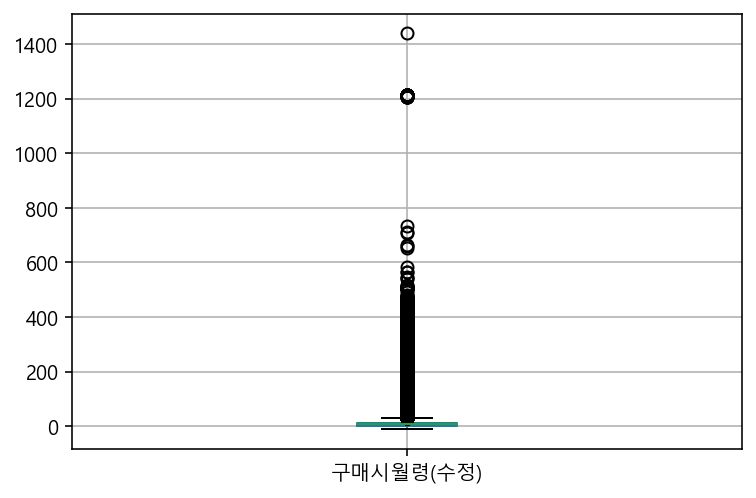

In [18]:
sales_data.boxplot(column = ['구매시월령(수정)'])
plt.show()

In [19]:
sales_data[sales_data['고객번호'] == '201812310749770']

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤


In [20]:
sales_data['구매시월령(수정)'].describe()

count    168142.000000
mean         14.845458
std          38.521315
min         -10.000000
25%           2.000000
50%           6.000000
75%          13.000000
max        1439.000000
Name: 구매시월령(수정), dtype: float64

<AxesSubplot:xlabel='구매시월령(수정)', ylabel='Count'>

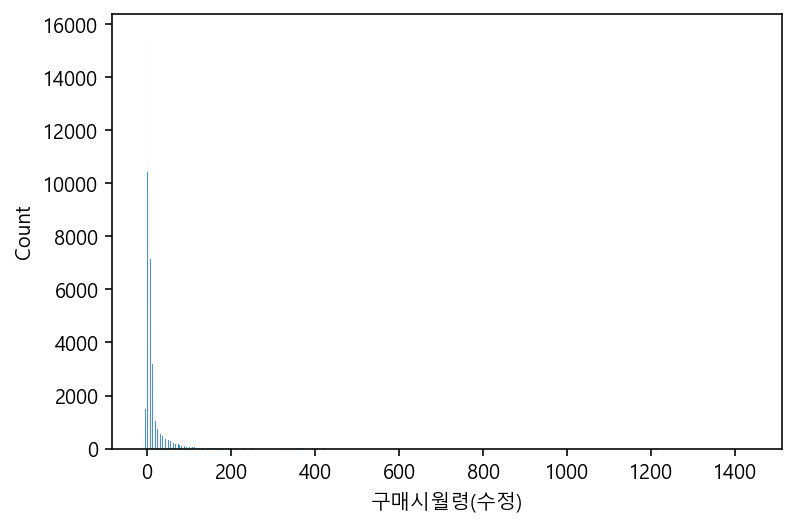

In [21]:
sns.histplot(sales_data, x="구매시월령(수정)")

In [22]:
over_ = sales_data[sales_data['구매시월령(수정)'] >= 8]
over_

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형)
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)
5,201907282649358,2019-07-29,2019-07-30,2019-08-02,8.0,201812310749774,101280,76744,기저귀,[2019년형] 하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형)
17,201909272881275,2019-09-28,2019-09-29,2019-10-01,8.0,201812310749784,47360,29952,팬티,하기스 맥스드라이 팬티 3단계 여아 116매(팬티형)
18,202001163303774,2020-01-17,2020-01-18,2020-01-20,12.0,201812310749784,13500,13500,기타,[필리앤임프스] 바디슈트 4종 택1
...,...,...,...,...,...,...,...,...,...,...
199962,20200616152300-27824950140,2020-06-17,2020-06-18,2020-06-20,23.0,20200603223916327908,43900,27372,팬티,2020 하기스 매직팬티 컴포트 썸머 3단계 공용 116매(팬티형) + 보너스 12...
199967,20200628072347-19416984457,2020-06-28,2020-06-29,2020-07-01,14.0,20200614095002296695,6900,5730,체험팩,NEW 하기스 맥스드라이 팬티 4단계 공용 20매(팬티형/체험팩) (EA)
199974,20200620124150-32007118641,2020-06-20,2020-06-21,2020-06-23,175.0,20200620123220059942,3150,2480,FMC,[2020년 3월 신제품] 크리넥스 안심 물티슈 휴대용 20매X3개입 (EA)
199975,20200620124150-32007118641,2020-06-20,2020-06-21,2020-06-23,175.0,20200620123220059942,0,0,FMC,(1+1) 크리넥스 버블버블 핸드워시 그린향 거품펌프형 250ml + 용기형리필 2...


In [23]:
sales_data['물품대분류'].unique()

array(['더블하트', '팬티', 'FMC', '기저귀', '체험팩', 'FC', '기타', '물티슈', 'SKC', 'SrC'],
      dtype=object)

In [24]:
product_data['물품대분류'].unique()

array(['FC', 'FMC', 'SKC', 'SrC', '기저귀', '기타', '더블하트', '물티슈', '체험팩', '팬티'],
      dtype=object)

In [25]:
product_data[product_data['물품대분류'] == 'FMC']

,물품대분류,상품명,물품판매량,제품단가
255,FMC,(1+1) 크리넥스 버블버블 핸드워시 그린향 거품펌프형 250ml + 용기형리필 2...,30,0
256,FMC,(1+1) 크리넥스 버블버블 핸드워시 상큼향 거품펌프형 250ml + 용기형리필 2...,17,0
257,FMC,(핫딜위크/1+1) 스카트 주방 위생 세트,12,0
258,FMC,(핫딜위크/1+1) 크리넥스 칼로리라이트 키친타월 55매 X 3롤,6,0
259,FMC,[1+1] 스카트 항균 프레쉬블루 빨아쓰는 행주타월 45매 X 4롤,30,24800
...,...,...,...,...
475,FMC,크리넥스 황사마스크 뉴디자인플러스 대형 3P,209,11866
476,FMC,크리넥스 황사마스크 뉴디자인플러스 소형 3P,309,16037
477,FMC,크리넥스 황사용 마스크 플러스 대형10P,222,19871
478,FMC,크리넥스/스카트 세트,54,38100


In [26]:
# member_data[member_data['ID'].str.contains('2018')]
member_data[member_data['ID'] == 2018]

,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부


In [27]:
member_data['ID'].astype('float').max()

201912291058171.0

In [28]:
member_data

,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
0,2.018123e+14,여,기혼,인천,37.0,국민은행,인스타그램,Yes
1,2.018123e+14,여,기혼,제주,33.0,국민은행,검색광고,Yes
2,2.018123e+14,여,기혼,부산,32.0,하나은행,네이버블로그,Yes
3,2.018123e+14,여,미혼,경남,34.0,기업은행,지인추천,No
4,2.018123e+14,여,기혼,서울,32.0,신한은행,직접검색,Yes
...,...,...,...,...,...,...,...,...
81089,2.019123e+14,여,기혼,경기,31.0,국민은행,오픈마켓,Yes
81090,2.019123e+14,여,기혼,경남,37.0,롯데카드,오픈마켓,Yes
81091,2.019123e+14,여,기혼,충북,26.0,삼성카드,검색광고,Yes
81092,2.019123e+14,여,기혼,경기,32.0,새마을금고,인스타그램,Yes


In [29]:
member_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81094 entries, 0 to 81093
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      81094 non-null  float64
 1   성별      81094 non-null  object 
 2   결혼유무    81094 non-null  object 
 3   거주지역    81094 non-null  object 
 4   연령      81094 non-null  float64
 5   결제등록카드  81094 non-null  object 
 6   유입경로    81094 non-null  object 
 7   자녀여부    81094 non-null  object 
dtypes: float64(2), object(6)
memory usage: 5.6+ MB


In [30]:
sales_data['고객번호'] = sales_data['고객번호'].astype('float')

In [31]:
df = pd.merge(sales_data, member_data, right_on='ID', left_on = '고객번호')
merge_outer = pd.merge(sales_data, member_data, right_on='ID', left_on = '고객번호', how = 'left')

In [32]:
merge_outer['ID'] = merge_outer['ID'].astype('str')

In [33]:
product_data['total'] = product_data['물품판매량'] * product_data['제품단가']

In [34]:
product_data['total'].max()

194683790

In [35]:
product_data[product_data['total'] == 194683790]

,물품대분류,상품명,물품판매량,제품단가,total
768,기저귀,하기스 네이처메이드 2단계 여아 156매(밴드형),3010,64679,194683790


In [36]:
no_outer = merge_outer[merge_outer['자녀여부'] == 'No']
yes_outer = merge_outer[merge_outer['자녀여부'] == 'Yes']

In [37]:
no_outer[no_outer['구매시월령(수정)'] >= 90]

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
1923,201901151902351,2019-01-15,2019-01-16,2019-01-19,117.0,2.019010e+14,19800,13751,SKC,그린핑거 마이키즈 로션 대용량 330ml,201901030751620.0,남,미혼,전남,31.0,우리은행,네이버블로그,No
1924,201901151902351,2019-01-15,2019-01-16,2019-01-19,117.0,2.019010e+14,2600,2574,FC,좋은느낌 순수 울트라 날개 중형 18개입,201901030751620.0,남,미혼,전남,31.0,우리은행,네이버블로그,No
2723,201902272089585,2019-02-28,2019-03-01,2019-03-05,314.0,2.019010e+14,12900,8157,더블하트,더블하트 SofTouch 모유실감 젖꼭지 S (2입),201901040752621.0,여,기혼,충북,32.0,우리은행,인스타그램,No
2724,201903312221678,2019-04-01,2019-04-02,2019-04-04,316.0,2.019010e+14,9500,7137,더블하트,더블하트 다기능 빨대 브러쉬,201901040752621.0,여,기혼,충북,32.0,우리은행,인스타그램,No
2725,201910243005683,2019-10-25,2019-10-26,2019-10-28,322.0,2.019010e+14,12900,9187,더블하트,더블하트 SofTouch 모유실감 젖꼭지 L (2입),201901040752621.0,여,기혼,충북,32.0,우리은행,인스타그램,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197214,201912193204396,2019-12-20,2019-12-21,2019-12-24,159.0,2.019122e+14,52800,30674,기저귀,하기스 보송보송 3단계 공용 186매(밴드형),201912191052918.0,여,미혼,서울,32.0,미래에셋증권,오픈마켓,No
197326,201912193206380,2019-12-20,2019-12-21,2019-12-23,108.0,2.019122e+14,7700,5227,FMC,크리넥스 안심 프리미엄 3겹 키친타월 140매 X 4롤,201912191053196.0,여,기혼,서울,31.0,BC카드,지인추천,No
197590,202001273336894,2020-01-27,2020-01-28,2020-01-30,184.0,2.019122e+14,12900,8064,FMC,크리넥스 3겹 수프림 소프트 27m 12롤,201912191053644.0,여,미혼,충북,33.0,광주은행,인스타그램,No
197997,201912203220117,2019-12-21,2019-12-22,2019-12-24,92.0,2.019122e+14,22500,12474,SKC,그린핑거 마이키즈 샴푸 대용량 500ml,201912201054504.0,여,기혼,경남,27.0,BC카드,검색광고,No


In [38]:
yes_outer[yes_outer['구매시월령(수정)'] >= 90]

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
318,202001093283175,2020-01-10,2020-01-11,2020-01-13,167.0,2.019010e+14,3000,3000,체험팩,맘큐 허그박스,201901010750103.0,여,기혼,경기,32.0,국민은행,검색광고,Yes
439,201901011864727,2019-01-01,2019-01-02,2019-01-04,98.0,2.019010e+14,23800,18848,물티슈,릴리유 무민 리미티드 아기물티슈 캡형 80매X10팩,201901010750193.0,남,기혼,부산,33.0,농협회원조합,네이버카페,Yes
447,201903312218708,2019-03-31,2019-04-01,2019-04-03,101.0,2.019010e+14,12000,8266,FMC,“스페인하숙에 나온 바로 그 행주” 스카트 항균 프레쉬블루 행주타올 45매 X 4롤,201901010750202.0,여,기혼,서울,31.0,신한은행,검색광고,Yes
448,201908302782324,2019-08-30,2019-08-31,2019-09-02,106.0,2.019010e+14,17600,15324,FMC,크리넥스 NEW 디럭스 미니_카카오 230매 X 6개입,201901010750202.0,여,기혼,서울,31.0,신한은행,검색광고,Yes
457,201903312221229,2019-04-01,2019-04-02,2019-04-04,341.0,2.019010e+14,2000,1584,FMC,크리넥스 여행용티슈 카카오프렌즈 70매 X 3개입,201901010750221.0,여,기혼,부산,35.0,국민은행,인스타그램,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198319,202002123396582,2020-02-12,2020-02-13,2020-02-15,143.0,2.019122e+14,54480,37622,기저귀,하기스 네이처메이드 밤부 2단계 여아 156매(밴드형),201912221055286.0,여,기혼,경남,38.0,농협회원조합,인스타그램,Yes
198769,201912253234186,2019-12-25,2019-12-26,2019-12-28,112.0,2.019123e+14,16500,10286,SKC,그린핑거 힘센 보습 울트라크림 300g,201912251056311.0,여,기혼,경기,34.0,신한은행,오픈마켓,Yes
199023,202001313356450,2020-01-31,2020-02-01,2020-02-05,156.0,2.019123e+14,6040,4851,체험팩,하기스 맥스드라이 3단계 공용 20매(밴드형/체험팩),201912261056947.0,여,기혼,경북,34.0,국민은행,네이버블로그,Yes
199024,20200623165452-20315027851,2020-06-24,2020-06-25,2020-06-27,161.0,2.019123e+14,5900,5841,체험팩,NEW 하기스 네이처메이드 팬티 3단계 남아 20매(팬티형/체험팩) (EA),201912261056947.0,여,기혼,경북,34.0,국민은행,네이버블로그,Yes


In [39]:
product = product_data[['물품대분류', '상품명', '제품단가']]

In [40]:
df = df.merge(product, on = ['물품대분류', '상품명'])

In [41]:
df['배송시작일']=pd.to_datetime(df['배송시작일'],format = '%Y-%m-%d')
df['구매일']=pd.to_datetime(df['구매일'],format = '%Y-%m-%d')
df['배송완료일']=pd.to_datetime(df['배송완료일'],format = '%Y-%m-%d')

In [42]:
# Yes : 1, No : 0
df['자녀여부'] = df['자녀여부'].replace('Yes', 1).replace('No', 0)

In [43]:
df['배송기간'] = df['배송완료일'] -df['배송시작일']
df['구매에서 배송완료까지'] = df['배송완료일']- df['구매일']
df['배송시작기간'] = df['배송시작일'] - df['구매일']

df.drop(['주문번호', 'ID'], axis = 1, inplace = True)

In [44]:
# 여성 : 1, 남성 : 0
# 기혼 : 1, 미혼 : 0
# 출산예정 : 0
df['성별'] = df['성별']. replace('여', 1).replace('남', 0)
df['결혼유무'] = df['결혼유무'].replace('기혼', 1).replace('미혼', 0)
df['고객번호'].astype('float64')
df['구매시월령(수정)'] = df['구매시월령(수정)'].fillna(0)
df[df['구매시월령(수정)'] < 0]

,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,제품단가,배송기간,구매에서 배송완료까지,배송시작기간
80,2019-01-31,2019-02-01,2019-02-03,-1.0,2.019011e+14,12900,7662,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,충남,27.0,롯데카드,네이버블로그,1,20583,2 days,3 days,1 days
88,2019-12-21,2019-12-22,2019-12-24,-5.0,2.019011e+14,12900,10216,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,인천,33.0,삼성카드,인스타그램,1,20583,2 days,3 days,1 days
130,2019-01-17,2019-01-18,2019-01-21,-1.0,2.019011e+14,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,부산,30.0,현대카드,지인추천,1,20583,3 days,4 days,1 days
136,2019-01-22,2019-01-23,2019-01-25,-1.0,2.019011e+14,12900,10206,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,서울,32.0,삼성카드,네이버블로그,1,20583,2 days,3 days,1 days
158,2019-01-31,2019-02-01,2019-02-04,-3.0,2.019011e+14,12900,7662,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,부산,32.0,하나은행,지인추천,1,20583,3 days,4 days,1 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199486,2020-04-03,2020-04-04,2020-04-06,-1.0,2.019102e+14,59000,59000,기타,[에불로보] 프랑스 국민 애착인형 액티비티 기린 + 딸랑이 인형증정 (택1),1,0,충북,40.0,농협회원조합,네이버블로그,0,59000,2 days,3 days,1 days
199503,2019-11-08,2019-11-09,2019-11-11,-3.0,2.019103e+14,29900,29900,기타,[도담도담오가닉] 아기띠워머 외출용 3종 기획 특선-브라운,1,1,대전,33.0,국민은행,오픈마켓,1,29900,2 days,3 days,1 days
199512,2019-12-18,2019-12-19,2019-12-22,-3.0,2.019111e+14,14500,14500,기타,[필리앤임프스] 신생아 속싸개 6종 택1,1,1,서울,35.0,농협회원조합,인스타그램,1,14500,3 days,4 days,1 days
199529,2020-07-09,2020-07-10,2020-07-12,-2.0,2.019112e+14,0,0,팬티,하기스 네이처메이드 밤부 4단계 여아 120매(밴드형) X2,1,1,서울,31.0,농협회원조합,네이버블로그,1,0,2 days,3 days,1 days


In [45]:
def minus_change(i):
    if i < 0:
        return 0
    else:
        return i

df['구매시월령(수정)'] = df['구매시월령(수정)'].apply(minus_change)

In [48]:
df['배송기간'] = df['배송기간'].dt.days
df_delay = df[df['배송기간']>=3]
pivot = pd.pivot_table(data = df_delay, index = '물품대분류', columns = '배송기간', values = '구매일', aggfunc = 'count')
pivot

배송기간,3,4
물품대분류,,
FC,2891,843
FMC,5946,1845
SKC,2132,675
SrC,2,1
기저귀,8219,2345
기타,1795,599
더블하트,8624,2587
물티슈,1934,625
체험팩,8201,2433


In [61]:
df_delay

,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,제품단가,배송기간,구매에서 배송완료까지,배송시작기간
0,2019-05-06,2019-05-07,2019-05-11,4.0,2.018123e+14,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,인천,37.0,국민은행,인스타그램,1,20583,4,5 days,1 days
2,2019-04-14,2019-04-15,2019-04-18,2.0,2.018123e+14,25800,17344,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,대전,32.0,농협중앙회,네이버카페,1,20583,3,4 days,1 days
3,2019-05-21,2019-05-22,2019-05-25,0.0,2.018123e+14,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,제주,32.0,롯데카드,네이버카페,1,20583,3,4 days,1 days
9,2019-03-21,2019-03-22,2019-03-25,4.0,2.019010e+14,12900,10206,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,서울,30.0,신한카드,네이버블로그,1,20583,3,4 days,1 days
16,2019-06-03,2019-06-04,2019-06-08,2.0,2.019010e+14,12900,10206,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,서울,39.0,농협중앙회,인스타그램,1,20583,4,5 days,1 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199562,2020-01-29,2020-01-30,2020-02-02,4.0,2.019122e+14,39900,39900,기타,[윈펀] 뉴 러닝 테이블,1,1,대전,30.0,농협중앙회,인스타그램,1,39900,3,4 days,1 days
199567,2020-02-26,2020-02-27,2020-03-01,5.0,2.019122e+14,40130,40130,기타,[윈펀] 뮤지컬 피아노 러닝 걸음마,1,1,대전,30.0,농협중앙회,인스타그램,1,40130,3,4 days,1 days
199569,2020-04-13,2020-04-14,2020-04-17,0.0,2.019122e+14,169200,111883,기저귀,NEW 하기스 네이처메이드 1단계 공용 186매(밴드형) X3,0,1,서울,38.0,신한은행,네이버카페,1,169200,3,4 days,1 days
199570,2020-04-12,2020-04-13,2020-04-16,0.0,2.019123e+14,169200,116186,기저귀,NEW 하기스 네이처메이드 1단계 공용 186매(밴드형) X3,1,1,강원,37.0,국민은행,직접검색,1,169200,3,4 days,1 days


<AxesSubplot:xlabel='물품대분류'>

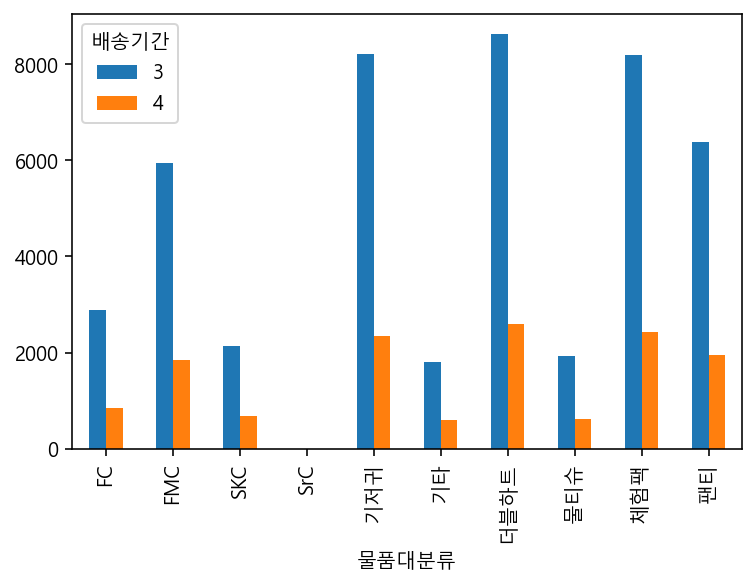

In [55]:
pivot.plot.bar()

In [60]:
# plt.figure(figsize = [15,10])
# sns.barplot(data = c_df_delay, x = '물품대분류', y = '구매일', hue = '배송기간')
# plt.title("물품대분류별 배송지연상품 합계")
# plt.show()

ValueError: Could not interpret input '물품대분류'

<Figure size 1080x720 with 0 Axes>

In [62]:
c_df_delay = df_delay.groupby(['물품대분류','배송기간'])[['제품단가']].count()

In [69]:
c_df_delay

제품단가
물품대분류 배송기간      
FC    3     2891
      4      843
FMC   3     5946
      4     1845
SKC   3     2132
      4      675
SrC   3        2
      4        1
기저귀   3     8219
      4     2345
기타    3     1795
      4      599
더블하트  3     8624
      4     2587
물티슈   3     1934
      4      625
체험팩   3     8201
      4     2433
팬티    3     6384
      4     1949

In [71]:
c_df_delay_2 = c_df_delay.reset_index()

In [72]:
c_df_delay_2

,물품대분류,배송기간,제품단가
0,FC,3,2891
1,FC,4,843
2,FMC,3,5946
3,FMC,4,1845
4,SKC,3,2132
5,SKC,4,675
6,SrC,3,2
7,SrC,4,1
8,기저귀,3,8219
9,기저귀,4,2345


In [75]:
c_df_delay_2 = c_df_delay_2.rename(columns={'제품단가':'구매갯수 합'})

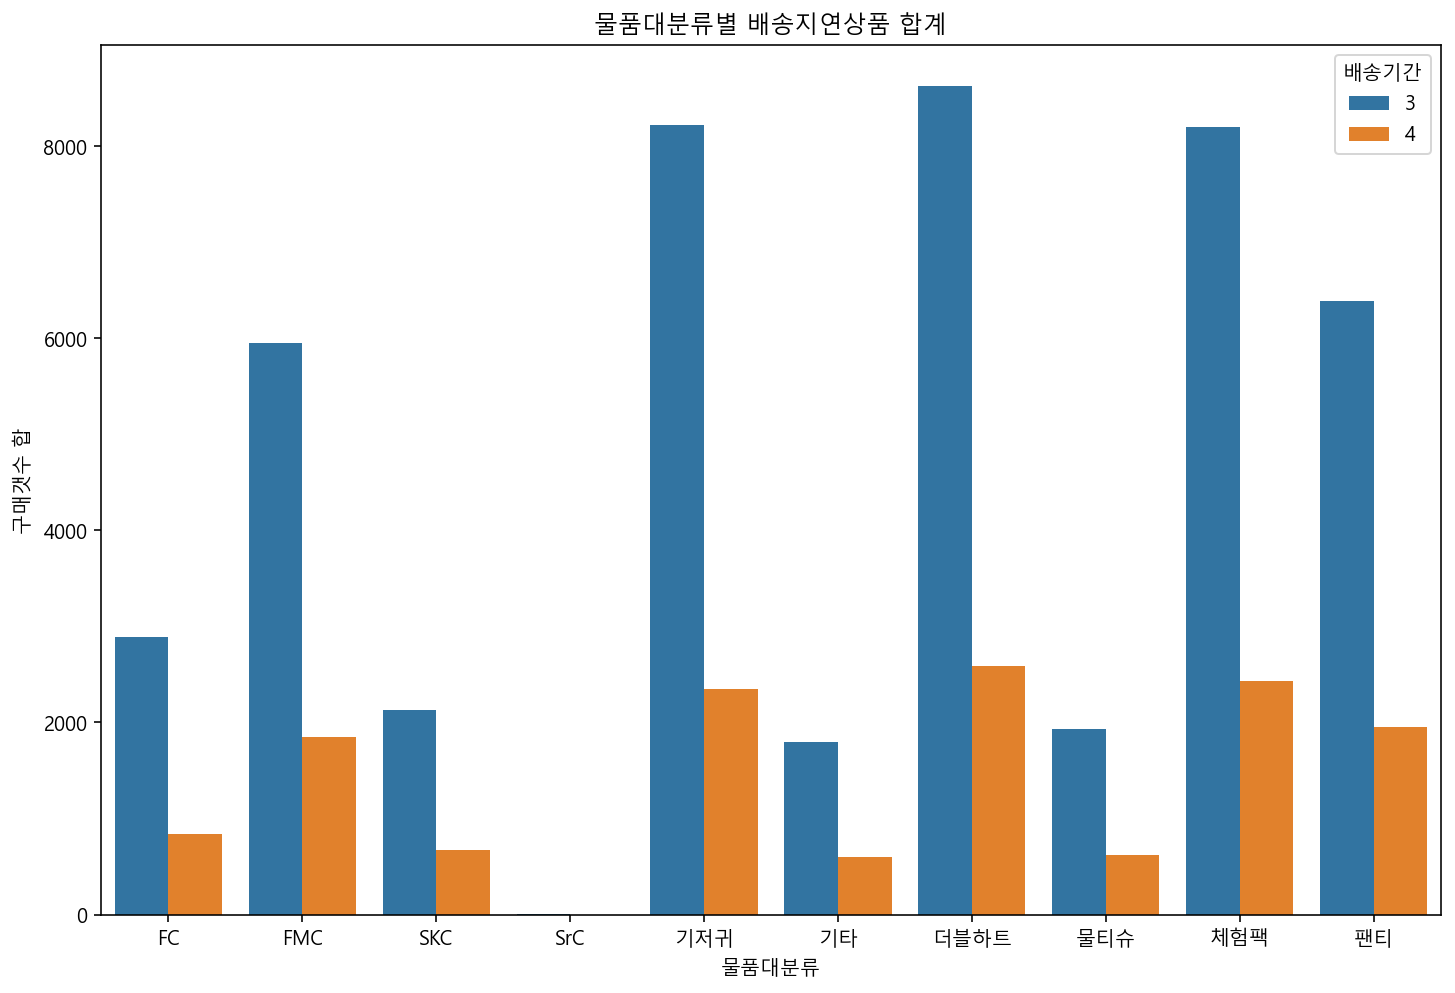

In [76]:
plt.figure(figsize = [12,8])
sns.barplot(data = c_df_delay_2, x = '물품대분류', y = '구매갯수 합', hue = '배송기간')
plt.title("물품대분류별 배송지연상품 합계")
plt.show()

구매일을 int값으로 변환

In [ ]:
df['구매일'] = df['구매일'].apply(lambda x: x.strftime('%Y%m'))
df['구매일'] = df['구매일'].astype(int)

(딥러닝이라서 못 쓸 수도)상품명과 물품대분류의 값들을 임베딩 처리를 합니다.(embedding)

In [ ]:
from tensorflow.keras.layers import Embedding

# Embedding 층은 적어도 두 개의 매개변수를 받습니다.
# 가능한 토큰의 개수(여기서는 1,000으로 단어 인덱스 최댓값 + 1입니다)와 임베딩 차원(여기서는 64)입니다
embedding_layer = Embedding(1000, 64)

from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing


# 특성으로 사용할 단어의 수
max_features = 10000
# 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용합니다)
maxlen = 20

# 정수 리스트로 데이터를 로드합니다.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 리스트를 (samples, maxlen) 크기의 2D 정수 텐서로 변환합니다.
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding

model = Sequential()
# 나중에 임베딩된 입력을 Flatten 층에서 펼치기 위해 Embedding 층에 input_length를 지정합니다.
model.add(Embedding(10000, 8, input_length=maxlen))
# Embedding 층의 출력 크기는 (samples, maxlen, 8)가 됩니다.

# 3D 임베딩 텐서를 (samples, maxlen * 8) 크기의 2D 텐서로 펼칩니다.
model.add(Flatten())

# 분류기를 추가합니다.
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

머신러닝을 합니다

In [ ]:
df_clustering = df[['구매일','고객번호','구매시월령(수정)','연령']]
df_clustering.head()
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_clustering_sc = sc.fit_transform(df_clustering)
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit(df_clustering_sc)
df_clustering.loc[:,"cluster"] = clusters.labels_
print(df_clustering["cluster"].unique())
df_clustering.head()

In [ ]:
df_clustering.columns = ['구매일','고객번호','구매시월령','연령','cluster']
df_clustering.groupby('cluster').count()

In [ ]:
df_clustering.groupby('cluster').mean()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X = df_clustering_sc
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df["cluster"] = df_clustering["cluster"]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in df_clustering["cluster"].unique():
    tmp = pca_df.loc[pca_df["cluster"]==i]
    plt.scatter(tmp[0],tmp[1])

In [ ]:
df_clustering = pd.concat([df_clustering,df],axis=1)
df_clustering.groupby(["cluster","구매시월령"],as_index=False).count()[["cluster","구매시월령","고객번호"]]